#1-1

In [5]:
import tensorflow as tf
from numpy import argmax
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Nadam
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Prepare output
unique_category_count = 10
print("Shape before one-hot encoding: ", train_labels.shape)
y_train = tf.one_hot(train_labels, unique_category_count)

y_test = tf.one_hot(test_labels, unique_category_count)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
# Prepare input
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
print(train_images.shape)
train_images = tf.reshape(train_images,[60000,784])

test_images = tf.reshape(test_images,[10000,784])
print(train_images.shape)
# normalizing the data to help with the training
train_images /= 255
test_images /= 255

(60000, 28, 28)
(60000, 784)


In [ ]:
# define model
model = Sequential()
model.add(Dense(10, activation='softmax'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])
# fit the model
model.fit(train_images, y_train, epochs=2, batch_size=100, verbose=1)
# evaluate the model
loss, acc = model.evaluate(test_images, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Epoch 1/2
600/600 [==============================] - 6s 7ms/step - loss: 0.6282 - accuracy: 0.8426
Epoch 2/2
600/600 [==============================] - 2s 3ms/step - loss: 0.3456 - accuracy: 0.9060
Test Accuracy: 0.917


In [ ]:
# predict
k = 1
test_im = tf.reshape(test_images[k],[1,784])
print(test_labels[k])
print(y_test[k].numpy())
yhat = model.predict(test_im)
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 95ms/step
Predicted: [[1.9820814e-03 9.5566080e-05 9.7056592e-01 5.2321837e-03 1.6146819e-08
  7.6177497e-03 1.3094783e-02 1.5201339e-09 1.4115052e-03 2.6819922e-07]] (class=2)


In [ ]:
# Import data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
# Prepare input
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
print(train_images.shape)
# normalizing the data to help with the training
train_images /= 255
test_images /= 255
# define model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='softmax'))
# compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(train_images, train_labels, epochs=20, batch_size=100,
verbose=1)
# evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test Accuracy: %.3f' % acc)

# predict
k = 1
test_im = tf.reshape(test_images[k],[1,28,28])
print(test_labels[k])
yhat = model.predict(test_im)
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

(60000, 28, 28)
Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.6264 - accuracy: 0.8442
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3469 - accuracy: 0.9059
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3096 - accuracy: 0.9147
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2924 - accuracy: 0.9191
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2819 - accuracy: 0.9215
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2747 - accuracy: 0.9236
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9249
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2654 - accuracy: 0.9267
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2623 - accuracy: 0.9265
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2593 - 

4422102/4422102 [==============================] - 0s 0us/step
1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 785       
                                                                 
 dense_3 (Dense)             (None, 10)                20        
                                                                 
Total params: 805 (3.14 KB)
Trainable params: 805 (3.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 2.0244 - accuracy: 0.1950 - val_loss: 1.8649 - val_accuracy: 0.2059
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 1.8126 

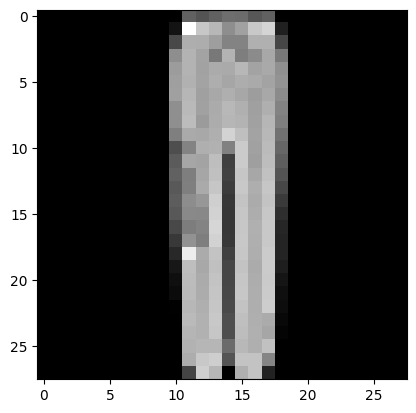

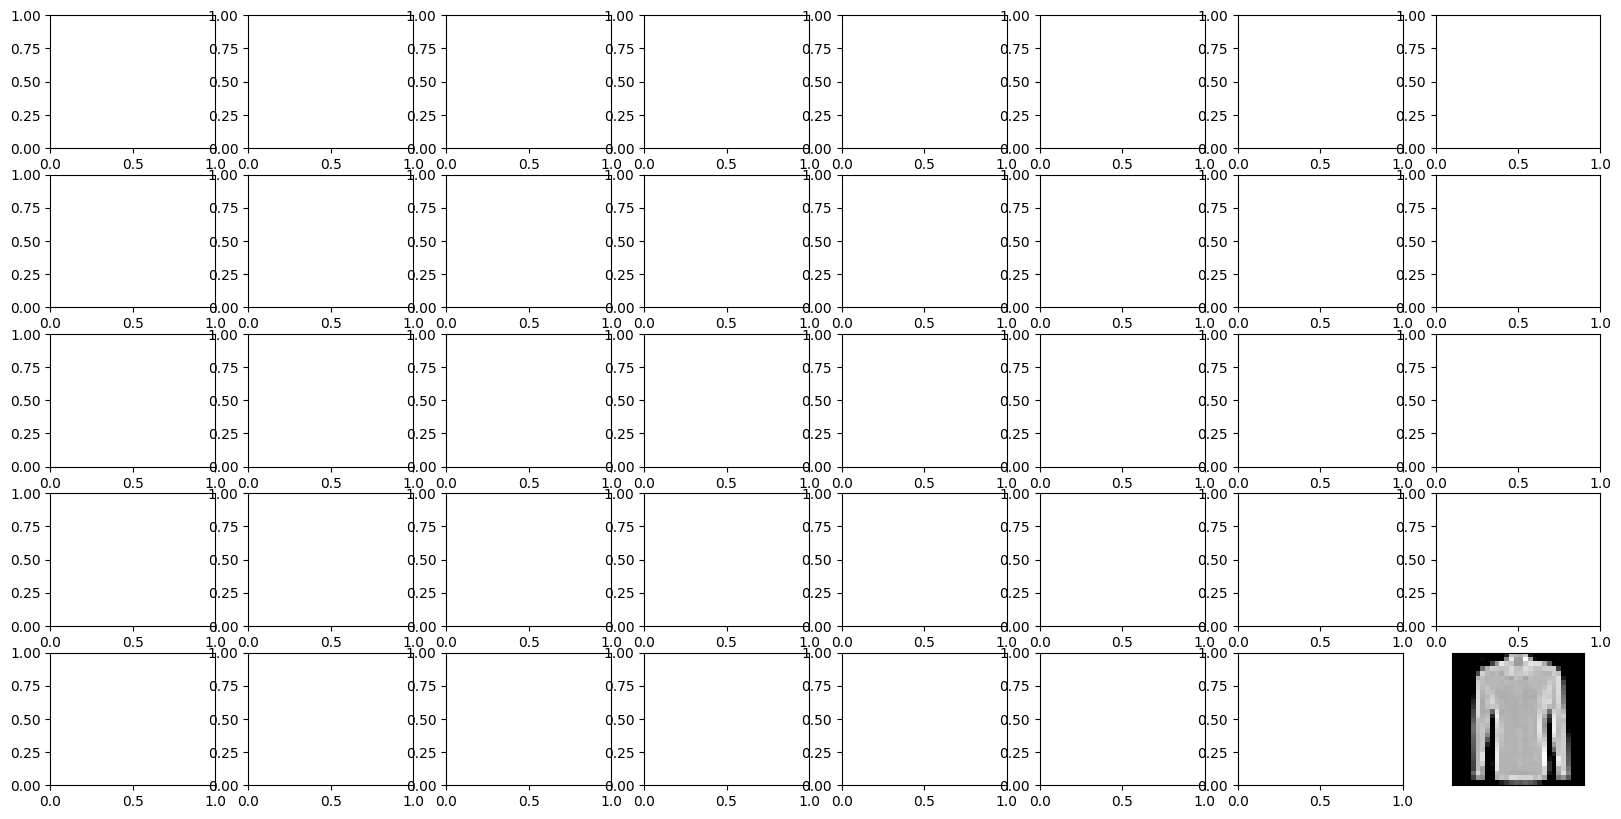

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# check some data
print (y_train[1000])
fig= plt.figure()
plt.imshow(x_train[1000], cmap='gray')
fig= plt.figure(figsize=(20,10))
for i in range (1,41):
    ax1 = fig.add_subplot(5,8,i)
plt.xticks([], [])
plt.yticks([], [])
ax1.imshow(x_train[i], cmap='gray')
# normalizing the data to help with the training
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# prepare output dictionary
di = {0:'T-shirt',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}
def train_model(model):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
    verbose=1, validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return model



# Single layer with 1 unit
model0 = Sequential()
model0.add(Flatten(input_shape=(28,28)))
model0.add(Dense(1, activation='relu', kernel_initializer='he_normal'))
model0.add(Dense(num_classes, activation='softmax'))
model0.summary()
model0.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_ = train_model(model0)


# Single layer with 10 units
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_ = train_model(model1)












In [ ]:
#single layer
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_ = train_model(model2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.5689 - accuracy: 0.8048 - val_loss: 0.4634 - val_accuracy: 0.8397
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4118 - accuracy: 0.8562 - val_loss: 0.4344 - val_accuracy: 0.8

In [ ]:
#single layer
model3 = Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(100, activation='sigmoid', kernel_initializer='he_normal'))
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_ = train_model(model3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.7229 - accuracy: 0.7777 - val_loss: 0.5155 - val_accuracy: 0.8197
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4530 - accuracy: 0.8419 - val_loss: 0.4617 - val_accuracy: 0.8

In [ ]:
#single layer
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(100, activation='sigmoid', kernel_initializer='he_normal'))
model4.add(Dense(num_classes, activation='softmax'))
model4.summary()
model4.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model_ = train_model(model4)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.8151 - accuracy: 0.5397 - val_loss: 1.4805 - val_accuracy: 0.6691
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 1.2946 - accuracy: 0.6960 - val_loss: 1.1619 - val_accuracy: 0.6

In [ ]:
#multi layer
model5 = Sequential()
model5.add(Flatten(input_shape=(28,28)))
model5.add(Dense(100, activation='sigmoid', kernel_initializer='he_normal'))
model5.add(Dense(num_classes, activation='softmax'))
model5.summary()
model5.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model_ = train_model(model5)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.7194 - accuracy: 0.7772 - val_loss: 0.5099 - val_accuracy: 0.8271
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4463 - accuracy: 0.8441 - val_loss: 0.4446 - val_accuracy: 0.

In [ ]:
#multi layer
model6 = Sequential()
model6.add(Flatten(input_shape=(28,28)))
model6.add(Dense(100, activation='sigmoid', kernel_initializer='he_normal'))
model6.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model6.add(Dense(num_classes, activation='softmax'))
model6.summary()
model6.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model_ = train_model(model6)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 84060 (328.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.6583 - accuracy: 0.7831 - val_loss: 0.4668 - val_accuracy: 0.8307
Epoch 

In [ ]:
batch_size = 128
num_classes = 10
epochs = 40
#multi layer
model7 = Sequential()
model7.add(Flatten(input_shape=(28,28)))
model7.add(Dense(100, activation='sigmoid', kernel_initializer='he_normal'))
model7.add(Dropout(0.3))
model7.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model7.add(Dropout(0.3))
model7.add(Dense(num_classes, activation='softmax'))
model7.summary()
model7.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model_ = train_model(model7)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_20 (Dense)            (None, 10)                510       
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 8406

In [ ]:
#multi layer
model8 = Sequential()
model8.add(Flatten(input_shape=(28,28)))
model8.add(Dense(100, activation='sigmoid', kernel_initializer='he_normal'))
model8.add(Dropout(0.3))
model8.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model8.add(Dropout(0.3))
model8.add(Dense(num_classes, activation='softmax'))
model8.summary()
model8.compile(loss='sparse_categorical_crossentropy', optimizer=Nadam(learning_rate=0.03), metrics=['accuracy'])
model_ = train_model(model8)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_23 (Dense)            (None, 10)                510       
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 8406

In [ ]:
#multi layer
model9 = Sequential()
model9.add(Flatten(input_shape=(28,28)))
model9.add(Dense(100, activation='sigmoid', kernel_initializer='he_normal'))
model9.add(Dropout(0.3))
model9.add(Dense(50, activation='linear', kernel_initializer='he_normal'))
model9.add(Dropout(0.3))
model9.add(Dense(num_classes, activation='softmax'))
model9.summary()
model9.compile(loss='sparse_categorical_crossentropy', optimizer=Nadam(learning_rate=0.001), metrics=['accuracy'])
model_ = train_model(model9)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 100)               78500     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_28 (Dense)            (None, 50)                5050      
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                510       
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 840

In [ ]:
#multi layer
model10 = Sequential()
model10.add(Flatten(input_shape=(28,28)))
model10.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model10.add(Dropout(0.5))
model10.add(Dense(50, activation='linear', kernel_initializer='he_normal'))
model10.add(Dropout(0.5))
model10.add(Dense(num_classes, activation='softmax'))
model10.summary()
model10.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model_ = train_model(model10)

NameError: name 'num_classes' is not defined

#2-2

In [20]:
import numpy as np
from google.colab import drive
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten


In [10]:
# load the dataset
#data from here https://github.com/jbrownlee/Datasets/blob/master/wheat-seeds.csv
drive.mount("/content/gdrive")
main_path = "/content/gdrive/MyDrive//ties4911/task2/wheat-seeds.csv"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
df = read_csv(main_path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values and scale them
X = X.astype('float32')
scaler_X = MinMaxScaler()
scaler_X.fit(X)
X = scaler_X.transform(X)
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# create dictionary of target classes
label_dict = {
0: 'Kama',
1: 'Rosa',
2: 'Canadian'
}


(140, 7) (70, 7) (140,) (70,)


In [23]:
#define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal',
input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='nadam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.957


#2-3

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def train_model(model):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
    verbose=1, validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return model

4422102/4422102 [==============================] - 0s 0us/step
1


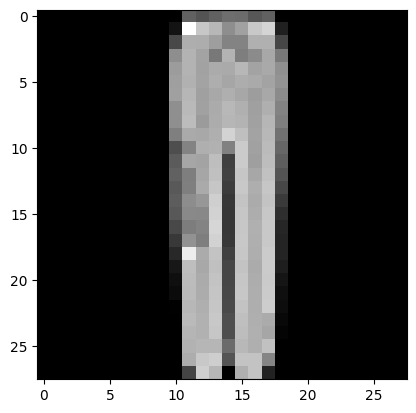

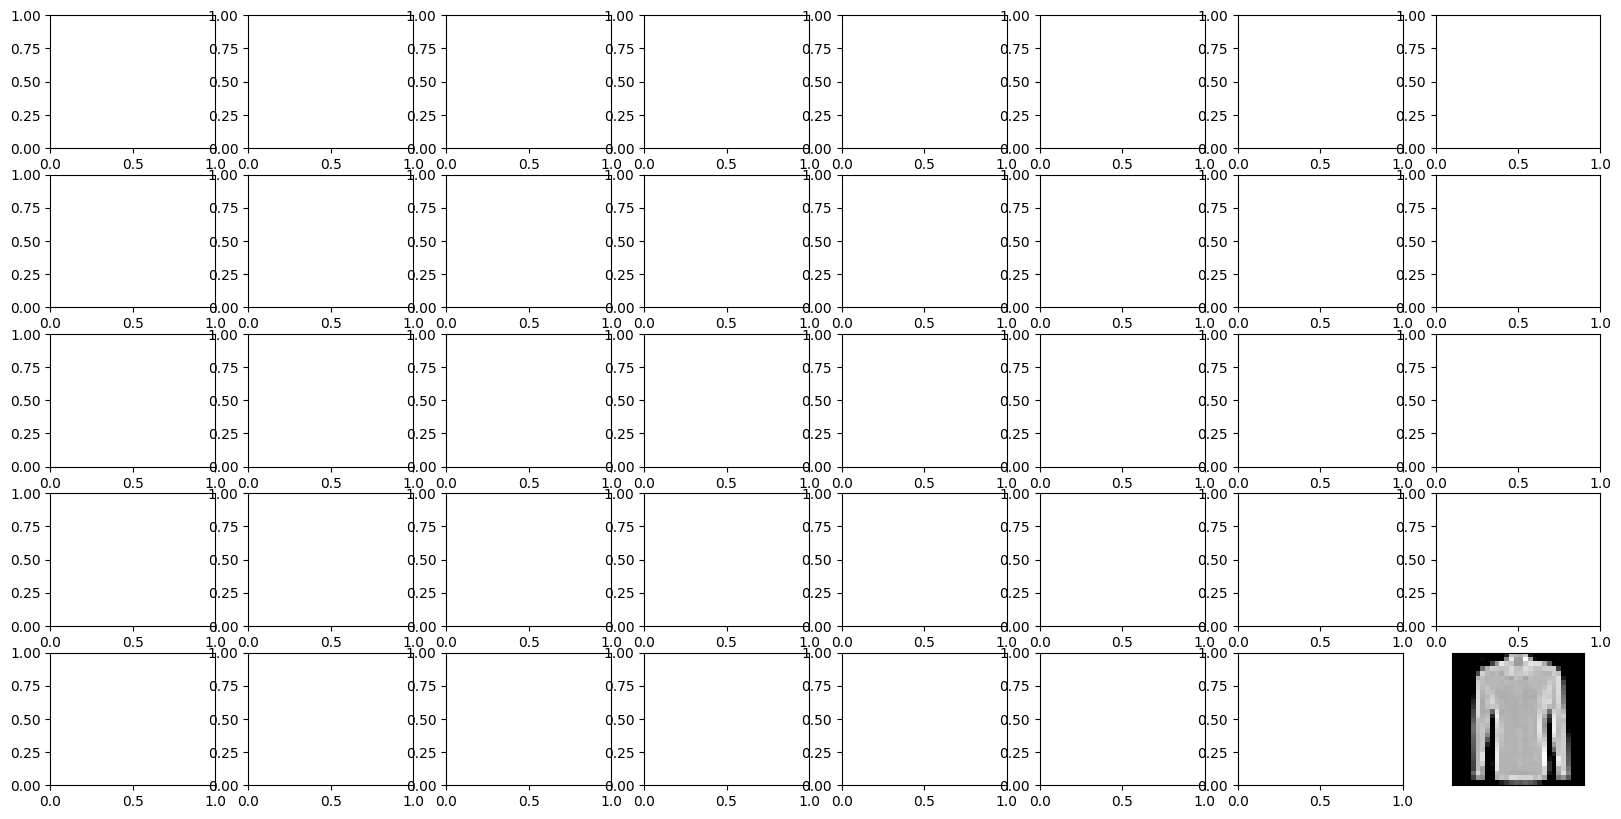

In [8]:
batch_size = 128
num_classes = 10
epochs = 20
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# check some data
print (y_train[1000])
fig= plt.figure()
plt.imshow(x_train[1000], cmap='gray')
fig= plt.figure(figsize=(20,10))
for i in range (1,41):
  ax1 = fig.add_subplot(5,8,i)
plt.xticks([], [])
plt.yticks([], [])
ax1.imshow(x_train[i], cmap='gray')
# normalizing the data to help with the training
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# prepare output dictionary
di = {0:'T-shirt',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}
# define and trian the model



In [3]:
# Define a function to visualize input data and predictions
# I got this from Chat-GPT
def visualize_predictions(model, x_data, y_data, class_labels, num_samples=5):
    predictions = model.predict(x_data)

    plt.figure(figsize=(15, 3 * num_samples))

    for i in range(num_samples):
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(x_data[i], cmap='gray')
        true_label = class_labels[y_data[i]]
        pred_label = class_labels[np.argmax(predictions[i])]
        plt.title(f'True: {true_label}\nPred: {pred_label}')
        plt.axis('off')

        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.bar(range(10), predictions[i])
        plt.xticks(range(10), [class_labels[j] for j in range(10)], rotation=45)
        plt.title('Prediction Probabilities')
        plt.xlabel('Class')
        plt.ylabel('Probability')

    plt.tight_layout()
    plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 785       
                                                                 
 dense_15 (Dense)            (None, 10)                20        
                                                                 
Total params: 805 (3.14 KB)
Trainable params: 805 (3.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 2.0946 - accuracy: 0.1987 - val_loss: 2.0035 - val_accuracy: 0.2263
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 1.9256 - accuracy: 0.2420 - val_loss: 1.8581 - val_accuracy: 0.2424
Epoc

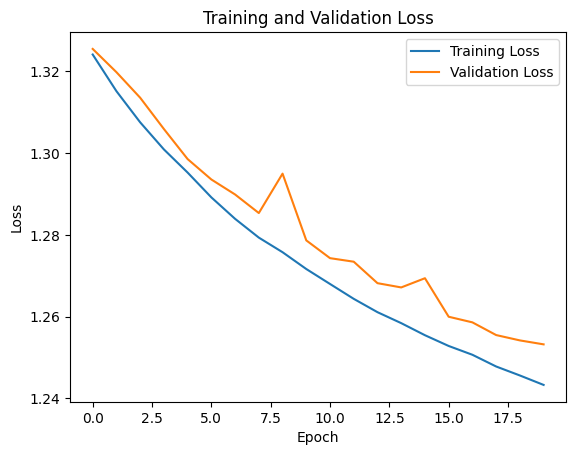

1/1 [==============================] - 0s 55ms/step


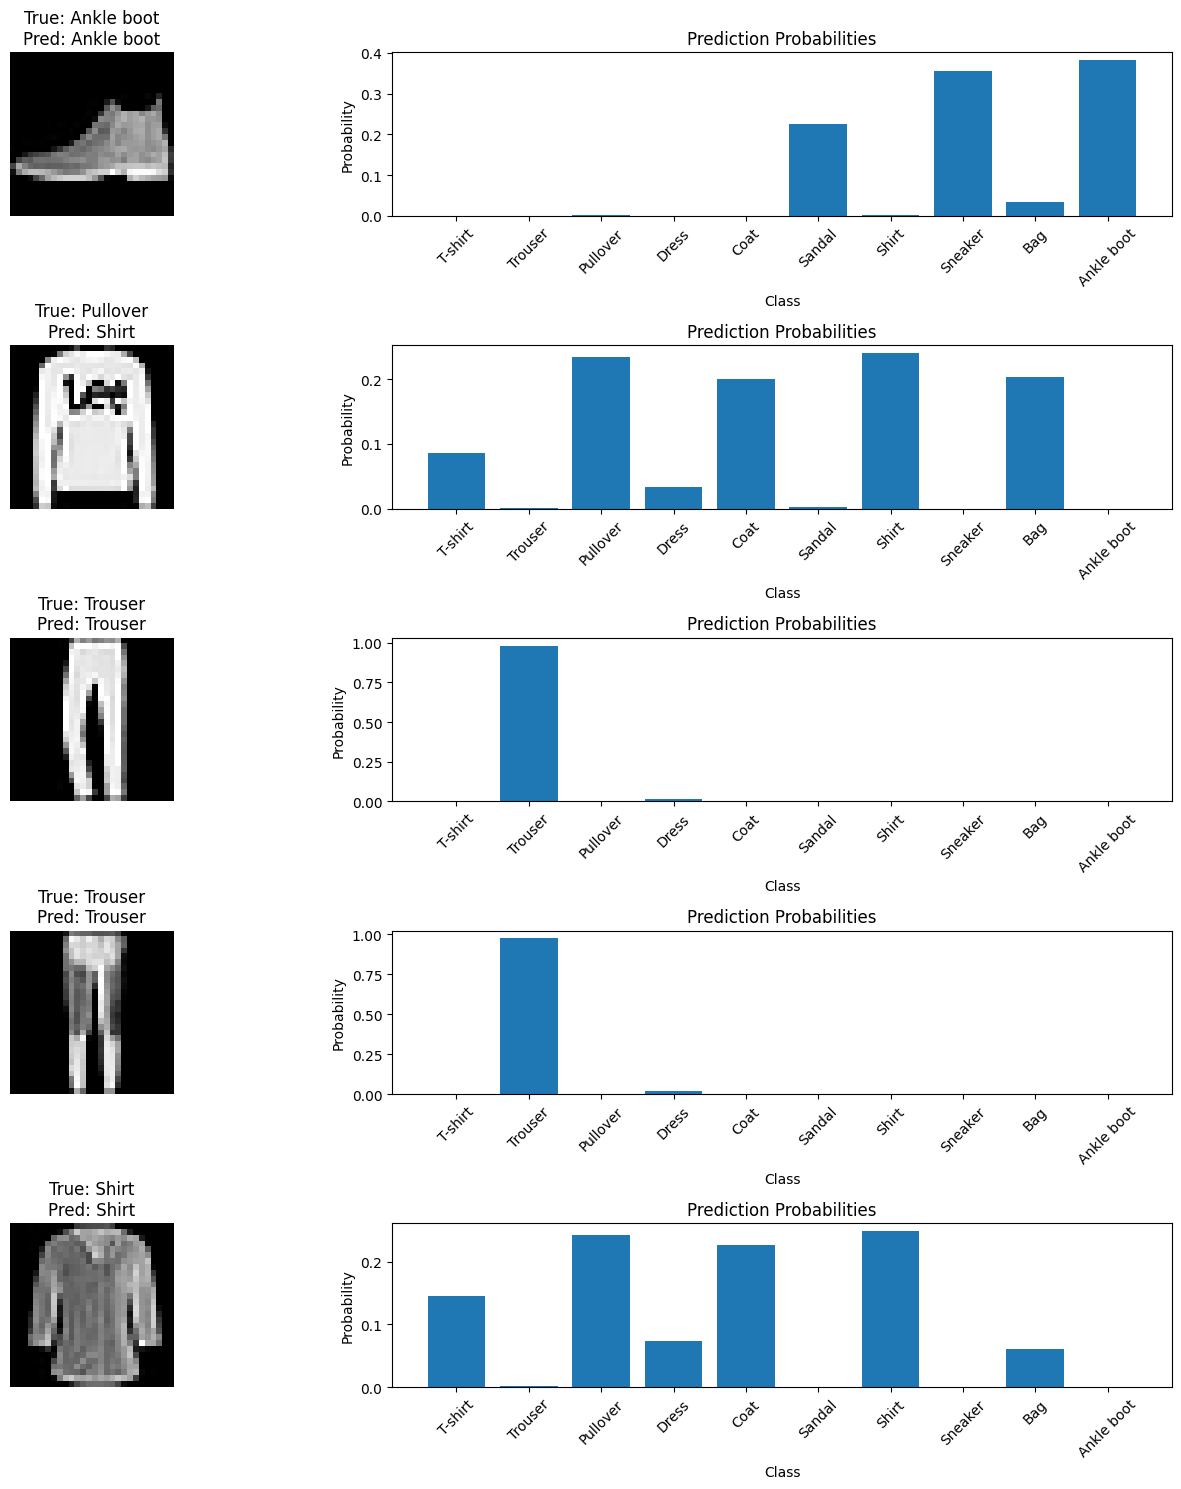

In [12]:
batch_size = 128
num_classes = 10
epochs = 20

# Single layer with 1 unit
model0 = Sequential()
model0.add(Flatten(input_shape=(28,28)))
model0.add(Dense(1, activation='relu', kernel_initializer='he_normal'))
model0.add(Dense(num_classes, activation='softmax'))
model0.summary()
model0.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_ = train_model(model0)



loss_and_metrics = model_.evaluate(x_test, y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])
# Train the model and store history
history = model0.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



num_samples_to_visualize = 5
visualize_predictions(model0, x_test[:num_samples_to_visualize], y_test[:num_samples_to_visualize], di)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_18 (Dense)            (None, 10)                510       
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 8406

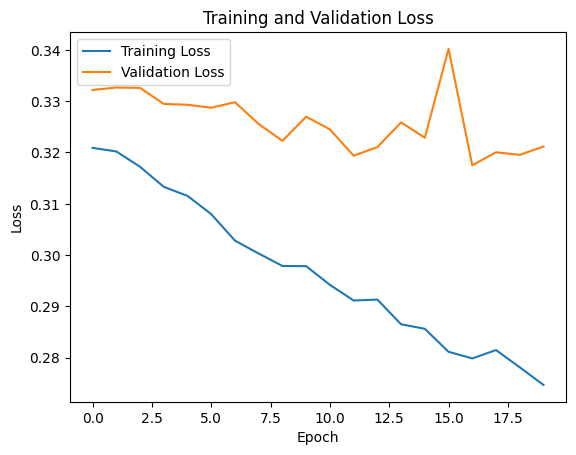

1/1 [==============================] - 0s 64ms/step


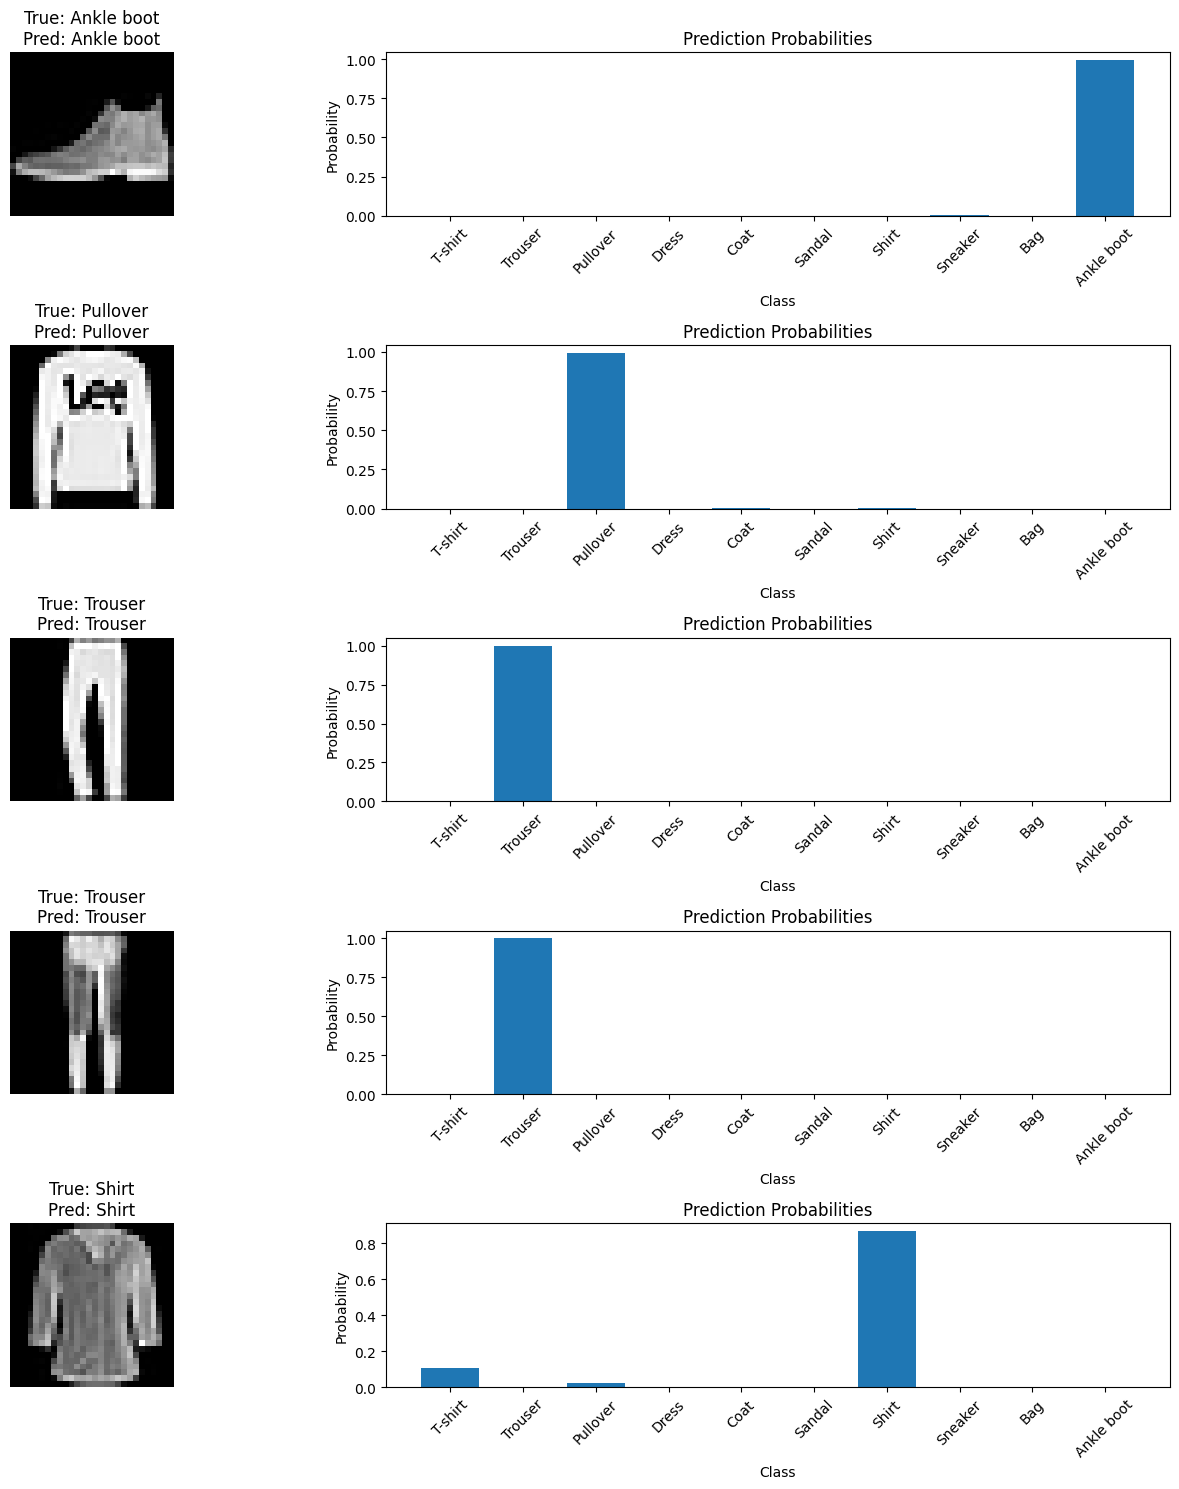

In [13]:
batch_size = 128
num_classes = 10
epochs = 20
#multi layer
model7 = Sequential()
model7.add(Flatten(input_shape=(28,28)))
model7.add(Dense(100, activation='sigmoid', kernel_initializer='he_normal'))
model7.add(Dropout(0.3))
model7.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model7.add(Dropout(0.3))
model7.add(Dense(num_classes, activation='softmax'))
model7.summary()
model7.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model_ = train_model(model7)

loss_and_metrics = model_.evaluate(x_test, y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

history = model7.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


num_samples_to_visualize = 5
visualize_predictions(model7, x_test[:num_samples_to_visualize], y_test[:num_samples_to_visualize], di)